In [1]:
from IPython.display import HTML

# Multiclassification task on image data


Dataset: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

<img src="img/fashion-mnist-sprite.png">

In [2]:
HTML('<img src="img/embedding.gif">')

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import SVG

from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras_preprocessing.image import NumpyArrayIterator, ImageDataGenerator

np.random.seed(1234)
%matplotlib inline

Using TensorFlow backend.


## Load dataset

In [4]:
fashion_mnist = fashion_mnist.load_data()

In [5]:
(train_X, train_y), (test_X, test_y) = fashion_mnist

## Excersize: plot the data

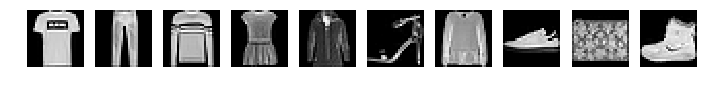

In [6]:
labels = np.unique(train_y)

plt.figure(figsize=(12, 6))

for i in labels:
    ax = plt.subplot(1, len(labels), i + 1)
    ax.axis('off')
    plt.imshow(train_X[train_y == i][0], 'gray')

## Scale data

In [7]:
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.

## Split data intro train, valid and test

In [8]:
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2, stratify=train_y)


print('#train:', len(train_X), '#valid:', len(valid_X), '#test:', len(test_X))

#train: 48000 #valid: 12000 #test: 10000


## Reshape data

In [9]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
valid_X = valid_X.reshape(-1, 28, 28, 1)

## One-hot encode targets

In keras when we solve multiclassification task we apply one-hot encoding

In [10]:
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)
valid_y_one_hot = to_categorical(valid_y)

## Excersize: solve task with a simple fully connected network (like in regression notebook)

hints:
    
    * loss = 'categorical_crossentropy'
    * metrics = ['accuracy']

In [11]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
valid_X = valid_X.reshape(-1, 28 * 28)

In [12]:
model = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_X, train_y_one_hot,
                    batch_size=32,
                    epochs=20,
                    validation_data=(valid_X, valid_y_one_hot))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 64us/step - loss: 0.6806 - acc: 0.7522 - val_loss: 0.4335 - val_acc: 0.8402
Epoch 2/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.5160 - acc: 0.8134 - val_loss: 0.4121 - val_acc: 0.8497
Epoch 3/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.4749 - acc: 0.8297 - val_loss: 0.3930 - val_acc: 0.8467
Epoch 4/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.4534 - acc: 0.8329 - val_loss: 0.3772 - val_acc: 0.8574
Epoch 5/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.4407 - acc: 0.8413 - val_loss: 0.3804 - val_acc: 0.8593
Epoch 6/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.4292 - acc: 0.8431 - val_loss: 0.3765 - val_acc: 0.8668
Epoch 7/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.4186 - acc: 0.8498 - val_loss: 0.3527 - val_acc

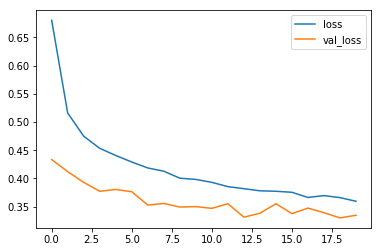

In [14]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

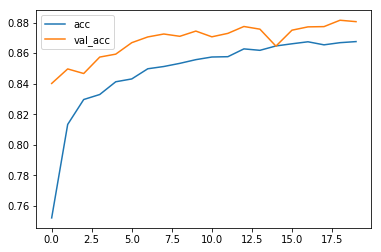

In [15]:
pd.DataFrame(history.history)[['acc', 'val_acc']].plot()

## Let's learn more about conv nets

[cs231n](http://cs231n.github.io/convolutional-networks)

In [16]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
valid_X = valid_X.reshape(-1, 28, 28, 1)

## 1st cnn

In [21]:
model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1))) 
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               3211520   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 3,214,410
Trainable params: 3,214,410
Non-trainable params: 0
_________________________________________________________________


## Plot the model

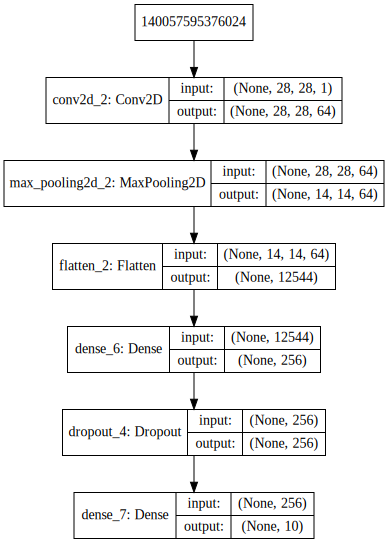

In [22]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
!rm -rf /tmp/checkpoints
!mkdir /tmp/checkpoints

checkpointer = ModelCheckpoint('/tmp/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5')

history = model.fit(train_X, train_y_one_hot,
                    batch_size=64,
                    epochs=20,
                    validation_data=(valid_X, valid_y_one_hot),
                    callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 84us/step - loss: 0.4855 - acc: 0.8266 - val_loss: 0.3283 - val_acc: 0.8818
Epoch 2/20
48000/48000 [==============================] - 4s 81us/step - loss: 0.3354 - acc: 0.8788 - val_loss: 0.2771 - val_acc: 0.8977
Epoch 3/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.2914 - acc: 0.8933 - val_loss: 0.2774 - val_acc: 0.8962
Epoch 4/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.2652 - acc: 0.9027 - val_loss: 0.2480 - val_acc: 0.9081
Epoch 5/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.2467 - acc: 0.9106 - val_loss: 0.2437 - val_acc: 0.9094
Epoch 6/20
48000/48000 [==============================] - 4s 82us/step - loss: 0.2290 - acc: 0.9149 - val_loss: 0.2547 - val_acc: 0.9064
Epoch 7/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.2150 - acc: 0.9196 - val_loss: 0.2339 - val_acc

## Excersize: plot learning curves and choose the best epoch

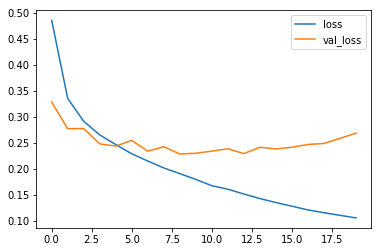

In [26]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

## Excersize: change model structure (add more conv->max_pool blocks)

[how to do it](http://cs231n.github.io/convolutional-networks/#layerpat)

`INPUT -> [CONV -> RELU -> CONV -> RELU -> POOL]*3 -> [FC -> RELU]*2 -> FC`

In [38]:
model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1))) 
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1))) 
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1))) 
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

!rm -rf /tmp/checkpoints
!mkdir /tmp/checkpoints

checkpointer = ModelCheckpoint('/tmp/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5')

history = model.fit(train_X, train_y_one_hot,
                    batch_size=64,
                    epochs=20,
                    validation_data=(valid_X, valid_y_one_hot),
                    callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 112us/step - loss: 0.5463 - acc: 0.8024 - val_loss: 0.3313 - val_acc: 0.8732
Epoch 2/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.3169 - acc: 0.8840 - val_loss: 0.2732 - val_acc: 0.8998
Epoch 3/20
48000/48000 [==============================] - 5s 103us/step - loss: 0.2613 - acc: 0.9048 - val_loss: 0.2421 - val_acc: 0.9131
Epoch 4/20
48000/48000 [==============================] - 5s 104us/step - loss: 0.2314 - acc: 0.9162 - val_loss: 0.2380 - val_acc: 0.9113
Epoch 5/20
48000/48000 [==============================] - 5s 104us/step - loss: 0.2044 - acc: 0.9260 - val_loss: 0.2212 - val_acc: 0.9209
Epoch 6/20
48000/48000 [==============================] - 5s 102us/step - loss: 0.1853 - acc: 0.9328 - val_loss: 0.2145 - val_acc: 0.9259
Epoch 7/20
48000/48000 [==============================] - 5s 100us/step - loss: 0.1671 - acc: 0.9388 - val_loss: 0.2244 - v

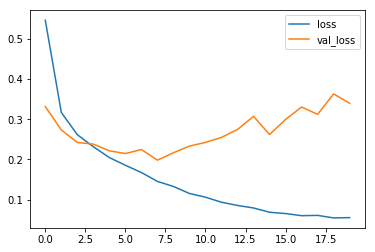

In [40]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()